## Problem Statement:

Given a dataset of customer information, we have to predict his/her total claim amount.

## Data Overview

1. 'months_as_customer'
2. 'age'
3. 'policy_number'
4. 'policy_bind_date',
5. 'policy_state'
6. 'policy_csl'
7. 'policy_deductable',
8. 'policy_annual_premium', 
9. 'umbrella_limit', 
10. 'insured_zip', 
11. 'insured_sex',
12. insured_education_level', 
13. 'insured_occupation', 
14. 'insured_hobbies',
15. 'insured_relationship', 
16. 'capital-gains', 
17. 'capital-loss',
18. 'incident_date', 
19. 'incident_type', 
20. 'collision_type', 
21. 'incident_severity',
22. 'authorities_contacted', 
23. 'incident_state', 
24. 'incident_city',
25. 'incident_location', 
26. 'incident_hour_of_the_day',
27. 'number_of_vehicles_involved', 
28. 'property_damage', 
29. 'bodily_injuries',
30. 'witnesses', 
31. 'police_report_available', 
32. 'total_claim_amount',
33. 'injury_claim', 
34. 'property_claim', 
35. 'vehicle_claim', 
36. 'auto_make',
37. 'auto_model', 
38. 'auto_year', 
39. 'fraud_reported'

## Importing Libraries

In [5]:
import numpy as np
import pandas as pd
pd.set_option("display.max_rows", None, "display.max_columns", None)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing


import warnings
warnings.filterwarnings('ignore')

In C:\Users\Roshan\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Roshan\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Roshan\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\Roshan\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Roshan\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_tes

In [6]:
#reading the dataset

df = pd.read_csv(r'insurance_claims.csv')
main_df = df.copy()
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,10/17/2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,1/25/2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,6/27/2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,1/21/2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,9/6/2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2/22/2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,5/25/1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,1/10/2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,6/6/2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2/17/2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [7]:
df.shape

(1000, 39)

In [8]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [9]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


In [10]:
df.describe(include='object')

,policy_bind_date,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,property_damage,police_report_available,auto_make,auto_model,fraud_reported
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,951,3,3,2,7,14,20,6,60,4,4,4,5,7,7,1000,3,3,14,39,2
top,1/1/2006,OH,250/500,FEMALE,JD,machine-op-inspct,reading,own-child,2/2/2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Springfield,1240 Tree Lane,?,?,Dodge,RAM,N
freq,3,352,351,537,161,93,64,183,28,419,292,354,292,262,157,1,360,343,80,43,753


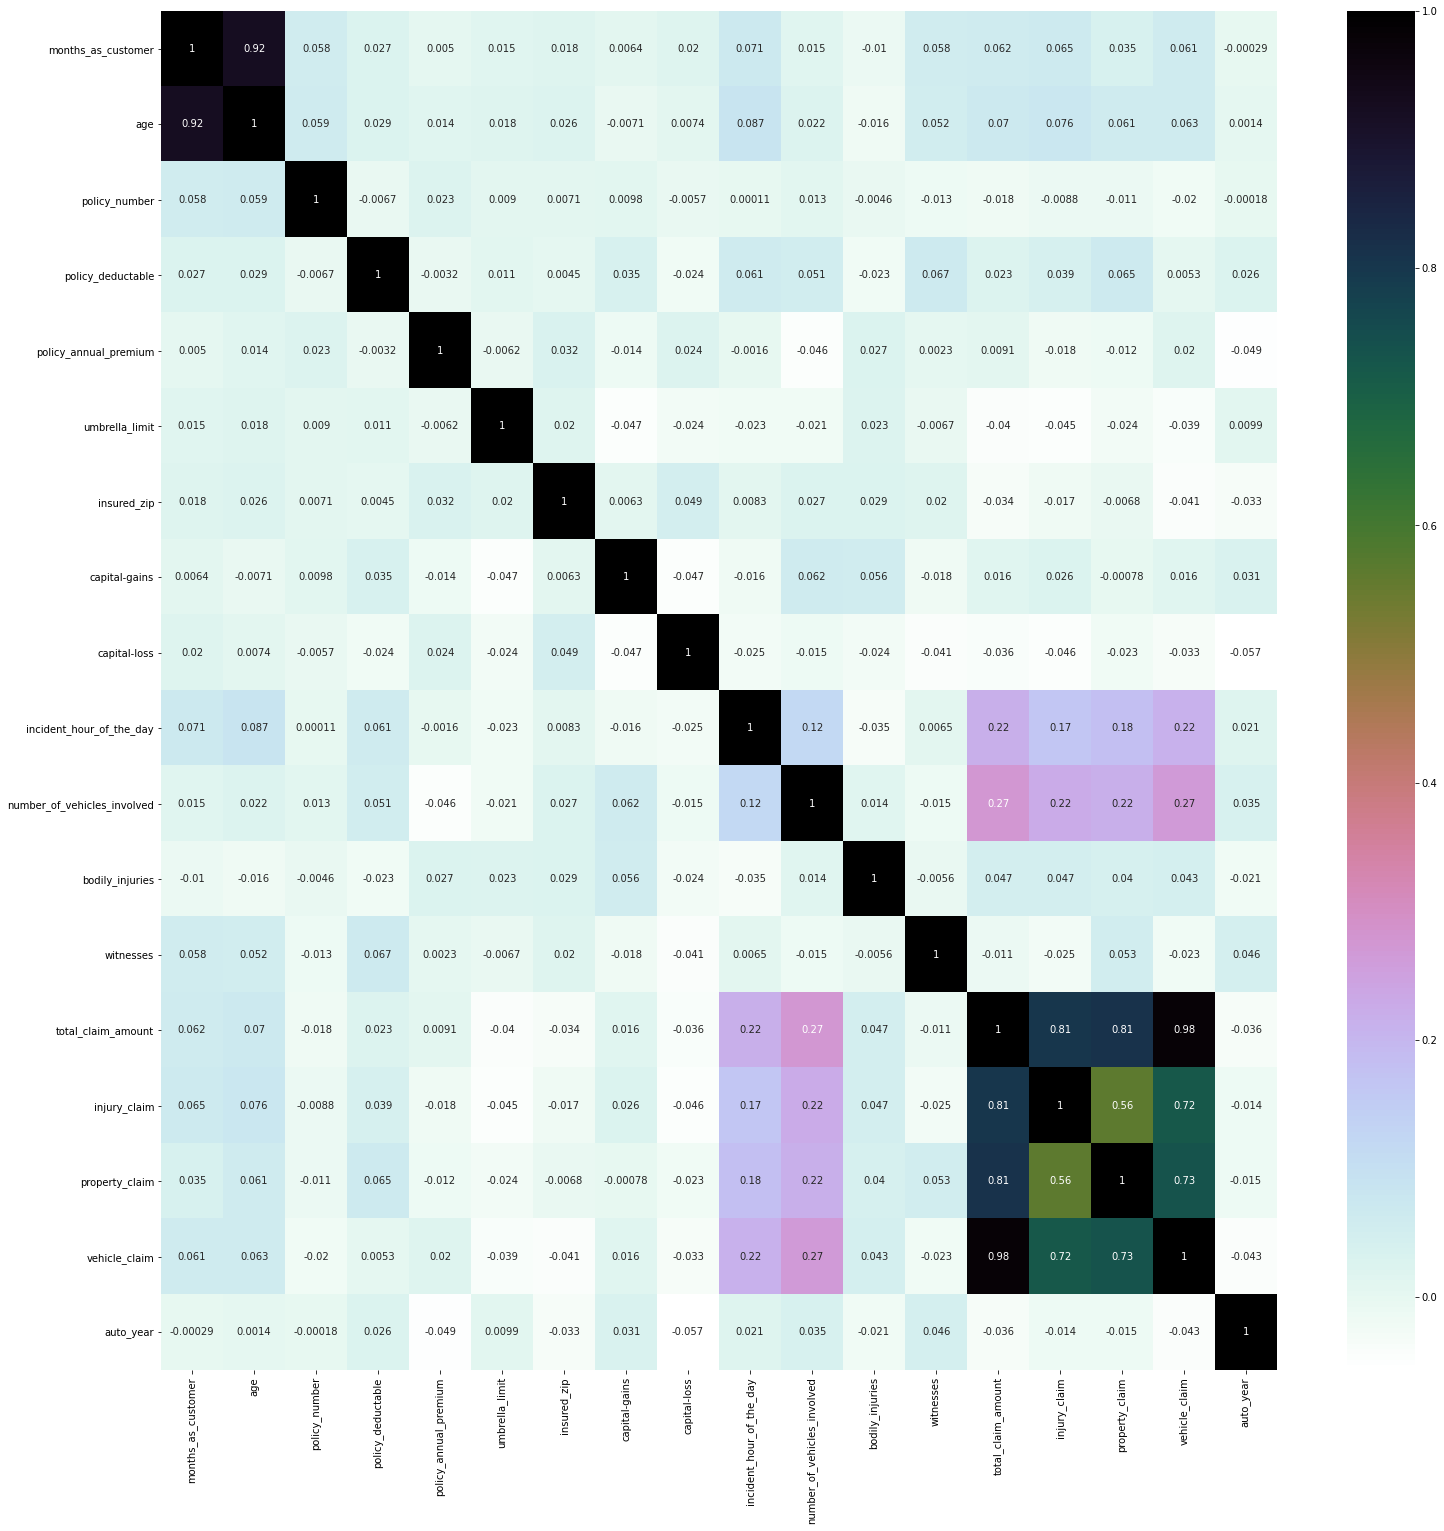

In [11]:
# corelation plot for all the features of the dataset
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(),
            annot=True,
            cmap='cubehelix_r')
plt.show()

In [12]:
corr = df.corr()
corr

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
months_as_customer,1.000000,0.922098,0.057555,0.026807,0.005018,0.015498,0.017895,0.006399,0.020209,0.070639,0.014736,-0.010162,0.058383,0.062108,0.065329,0.034940,0.061013,-0.000292
age,0.922098,1.000000,0.059413,0.029188,0.014404,0.018126,0.025604,-0.007075,0.007368,0.087161,0.022102,-0.015679,0.052359,0.069863,0.075522,0.060898,0.062588,0.001354
policy_number,0.057555,0.059413,1.000000,-0.006738,0.022566,0.008968,0.007083,0.009802,-0.005669,0.000113,0.013432,-0.004558,-0.012661,-0.018009,-0.008762,-0.010678,-0.020184,-0.000183
policy_deductable,0.026807,0.029188,-0.006738,1.000000,-0.003245,0.010870,0.004545,0.035212,-0.023544,0.060935,0.051214,-0.022765,0.066639,0.022839,0.039107,0.064792,0.005269,0.026105
policy_annual_premium,0.005018,0.014404,0.022566,-0.003245,1.000000,-0.006247,0.032354,-0.013738,0.023547,-0.001578,-0.045991,0.026780,0.002332,0.009094,-0.017633,-0.011654,0.020246,-0.049226
umbrella_limit,0.015498,0.018126,0.008968,0.010870,-0.006247,1.000000,0.019671,-0.047268,-0.024056,-0.023257,-0.021270,0.022743,-0.006738,-0.040344,-0.045412,-0.023790,-0.038584,0.009893
insured_zip,0.017895,0.025604,0.007083,0.004545,0.032354,0.019671,1.000000,0.006303,0.049372,0.008274,0.027448,0.028695,0.019805,-0.033873,-0.017495,-0.006841,-0.041083,-0.032736
capital-gains,0.006399,-0.007075,0.009802,0.035212,-0.013738,-0.047268,0.006303,1.000000,-0.046904,-0.016406,0.061643,0.055829,-0.017651,0.015980,0.025934,-0.000779,0.015836,0.031398
capital-loss,0.020209,0.007368,-0.005669,-0.023544,0.023547,-0.024056,0.049372,-0.046904,1.000000,-0.025054,-0.014895,-0.024418,-0.041330,-0.036060,-0.046060,-0.022863,-0.032665,-0.056615
incident_hour_of_the_day,0.070639,0.087161,0.000113,0.060935,-0.001578,-0.023257,0.008274,-0.016406,-0.025054,1.000000,0.120794,-0.034563,0.006527,0.217702,0.165768,0.179536,0.215626,0.021368


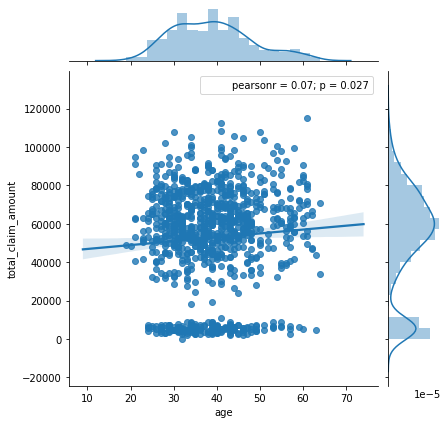

In [13]:
# From below plot, we can see that insurance charges are increasing with increase on age.

from scipy import stats
g = sns.JointGrid(df['age'],df['total_claim_amount'])
g = g.plot(sns.regplot, sns.distplot)
g = g.annotate(stats.pearsonr)

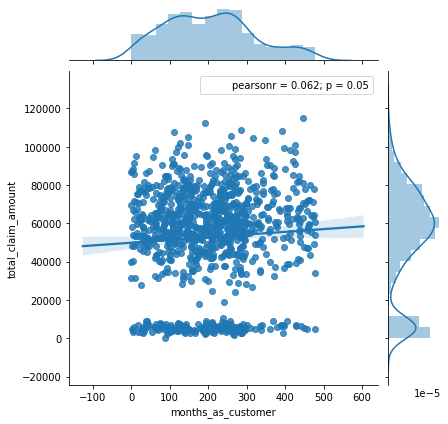

In [14]:
# From below plot, we can see that insurance charges are increasing with increase on age.

from scipy import stats
g = sns.JointGrid(df['months_as_customer'],df['total_claim_amount'])
g = g.plot(sns.regplot, sns.distplot)
g = g.annotate(stats.pearsonr)

Text(0.5, 1.0, 'Gender vs Total Claim Charges')

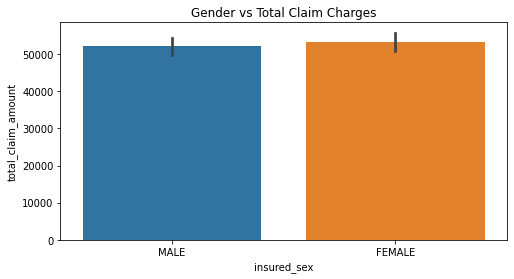

In [15]:
plt.figure(figsize = (8, 4))
sns.barplot(x = 'insured_sex', y = 'total_claim_amount', data = df)

plt.title('Gender vs Total Claim Charges')

Text(0.5, 1.0, 'Fraud Reported vs Total Claim Charges')

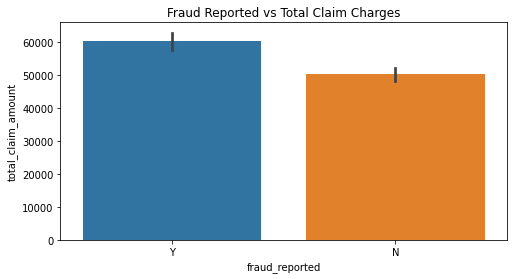

In [16]:
plt.figure(figsize = (8, 4))
sns.barplot(x = 'fraud_reported', y = 'total_claim_amount', data = df)

plt.title('Fraud Reported vs Total Claim Charges')

Text(0.5, 1.0, 'No of Body Injuries vs Total Claim Charges')

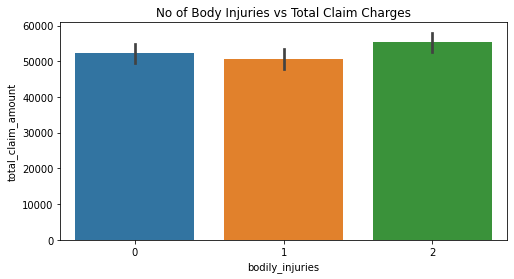

In [17]:
plt.figure(figsize = (8, 4))
sns.barplot(x = 'bodily_injuries', y = 'total_claim_amount', data = df)

plt.title('No of Body Injuries vs Total Claim Charges')

Text(0.5, 1.0, 'Age vs Total Claim Charges')

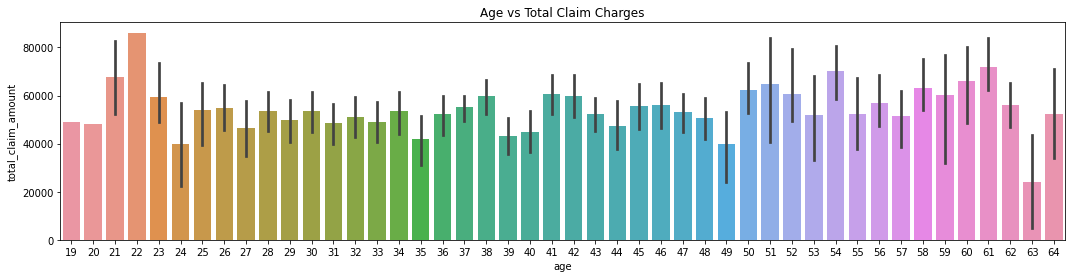

In [18]:
plt.figure(figsize = (18, 4))
sns.barplot(x = 'age', y = 'total_claim_amount', data = df)

plt.title('Age vs Total Claim Charges')

Text(0.5, 1.0, 'Policy State vs Total Claim Charges')

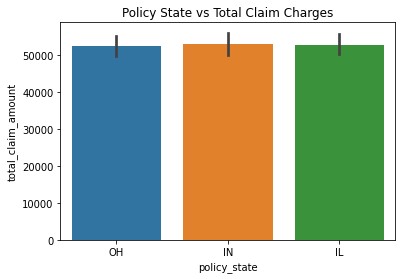

In [19]:

plt.figure(figsize = (6, 4))
sns.barplot(x = 'policy_state', y = 'total_claim_amount', data = df)

plt.title('Policy State vs Total Claim Charges')

Text(0.5, 1.0, 'Education Level vs Total Claim Charges')

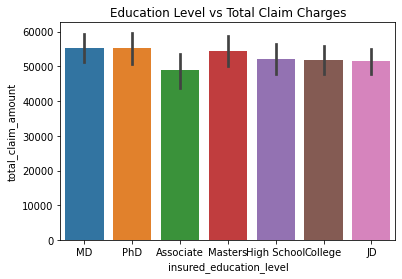

In [20]:

plt.figure(figsize = (6, 4))
sns.barplot(x = 'insured_education_level', y = 'total_claim_amount', data = df)

plt.title('Education Level vs Total Claim Charges')

Text(0.5, 1.0, 'Insured_Occupation vs Total_Claim_Amount')

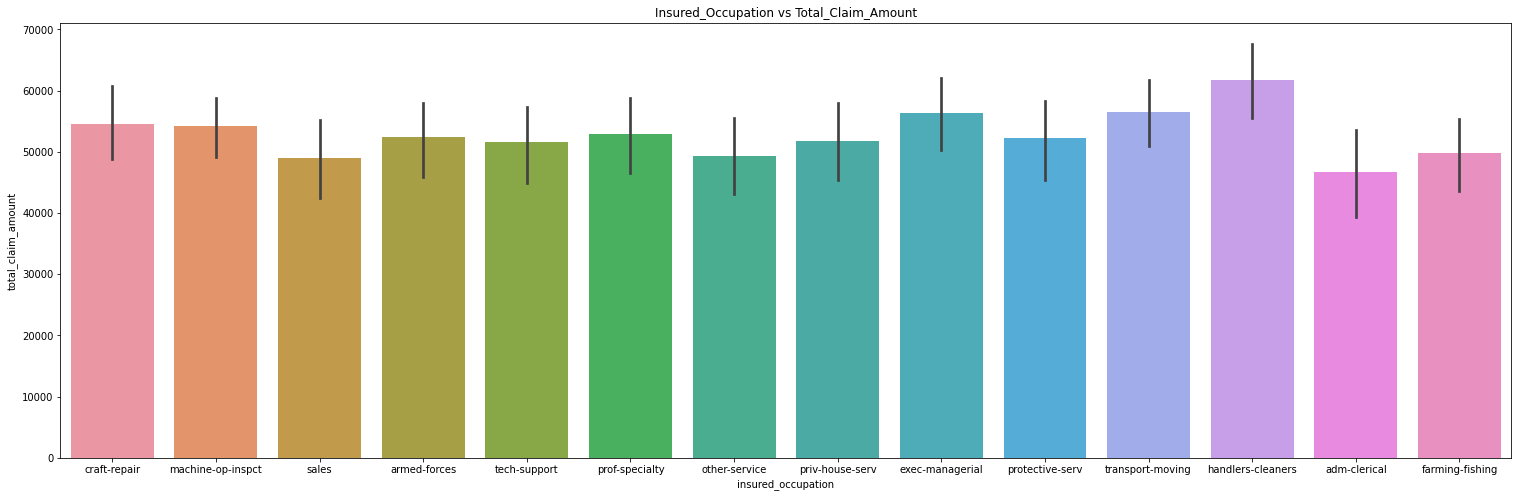

In [21]:

plt.figure(figsize = (26, 8))
sns.barplot(x = 'insured_occupation', y = 'total_claim_amount', data = df)

plt.title('Insured_Occupation vs Total_Claim_Amount')

Text(0.5, 1.0, 'Insured_Hobbies vs Total_Claim_Amount')

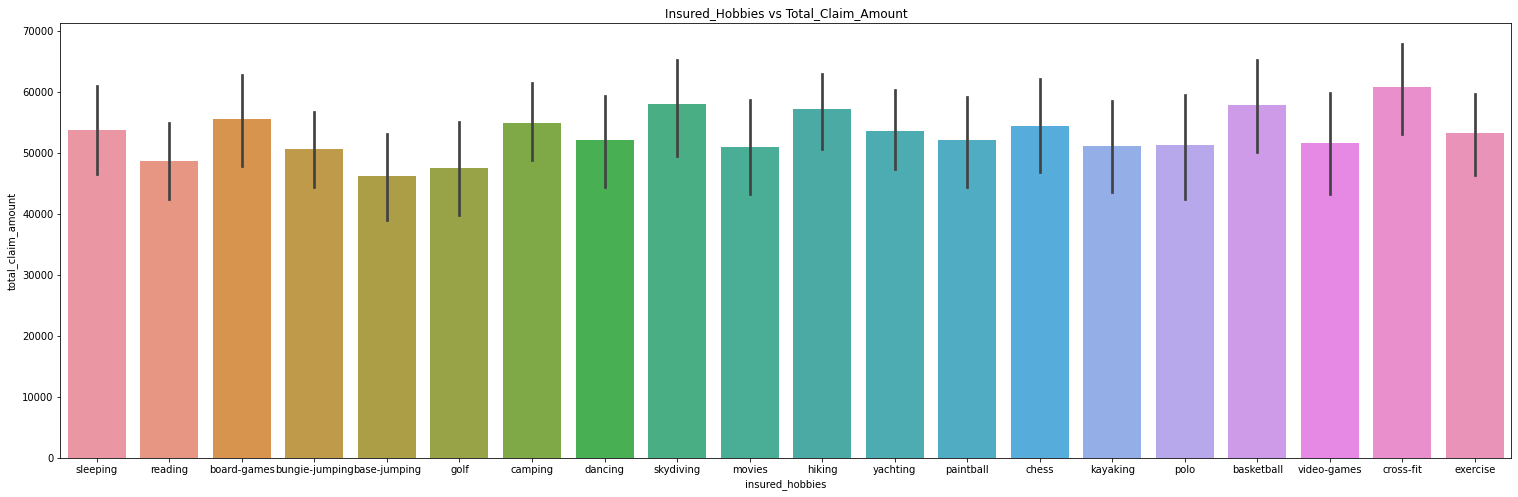

In [22]:
plt.figure(figsize = (26, 8))
sns.barplot(x = 'insured_hobbies', y = 'total_claim_amount', data = df)

plt.title('Insured_Hobbies vs Total_Claim_Amount')

Text(0.5, 1.0, 'Insured_Relationship vs Total_Claim_Amount')

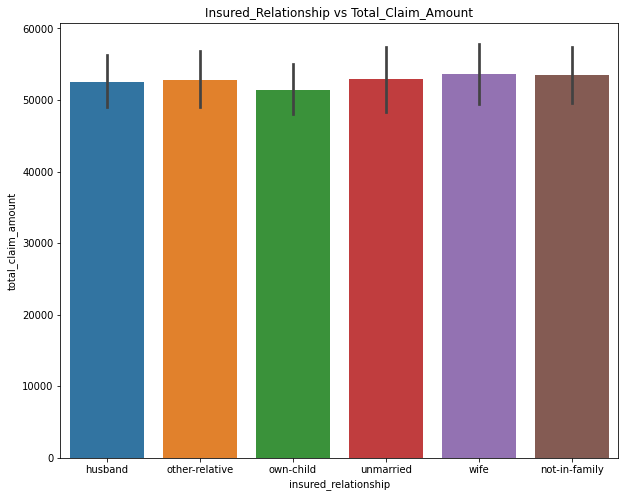

In [23]:
plt.figure(figsize = (10, 8))
sns.barplot(x = 'insured_relationship', y = 'total_claim_amount', data = df)

plt.title('Insured_Relationship vs Total_Claim_Amount')

Text(0.5, 1.0, 'Incident Severity vs Total_Claim_Amount')

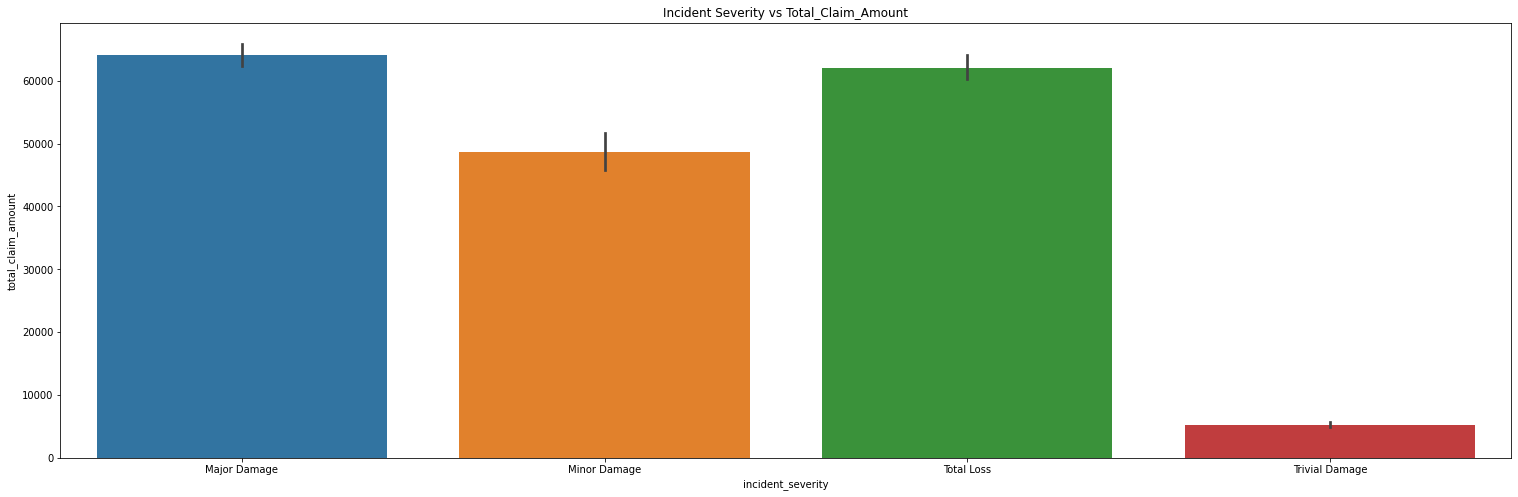

In [24]:
plt.figure(figsize = (26, 8))
sns.barplot(x = 'incident_severity', y = 'total_claim_amount', data = df)

plt.title('Incident Severity vs Total_Claim_Amount')

Text(0.5, 1.0, 'Incident City vs Total_Claim_Amount')

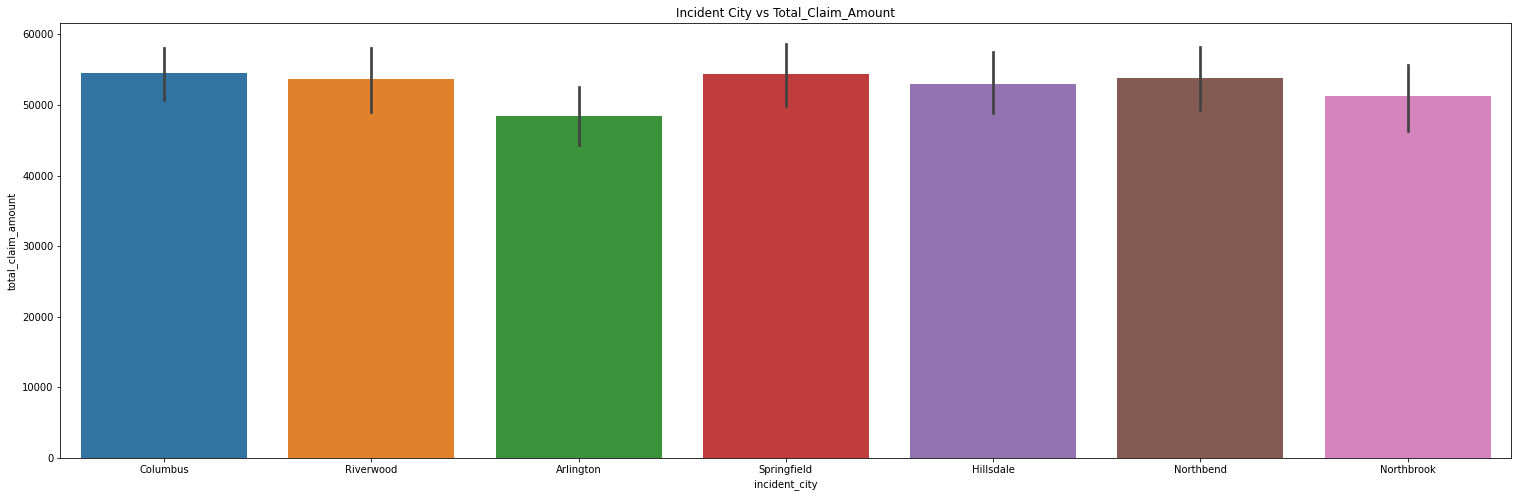

In [25]:
plt.figure(figsize = (26, 8))
sns.barplot(x = 'incident_city', y = 'total_claim_amount', data = df)

plt.title('Incident City vs Total_Claim_Amount')

Text(0.5, 1.0, 'Incident State vs Total_Claim_Amount')

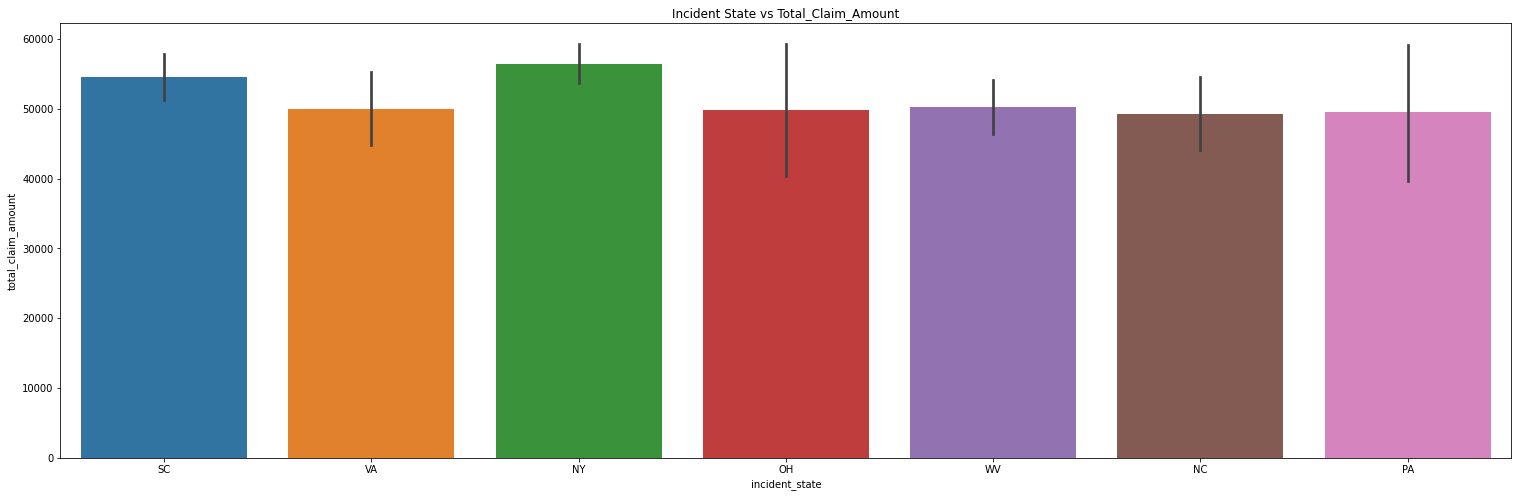

In [26]:
plt.figure(figsize = (26, 8))
sns.barplot(x = 'incident_state', y = 'total_claim_amount', data = df)

plt.title('Incident State vs Total_Claim_Amount')

In [27]:
#Remove Less Correlated Columns
deleteCols = ["policy_number", "policy_deductable", "policy_bind_date", "policy_annual_premium", "umbrella_limit",
              "capital-gains", "capital-loss", "witnesses", "insured_zip", "incident_location", "incident_date","umbrella_limit",
             ]
df = df.drop(deleteCols, axis=1)
df.head()

,months_as_customer,age,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,OH,250/500,MALE,MD,craft-repair,sleeping,husband,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,5,1,YES,1,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,IN,250/500,MALE,MD,machine-op-inspct,reading,other-relative,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,8,1,?,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,OH,100/300,FEMALE,PhD,sales,board-games,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7,3,NO,2,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,IL,250/500,FEMALE,PhD,armed-forces,board-games,unmarried,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,5,1,?,1,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,IL,500/1000,MALE,Associate,sales,board-games,unmarried,Vehicle Theft,?,Minor Damage,None,NY,Arlington,20,1,NO,0,NO,6500,1300,650,4550,Accura,RSX,2009,N


Text(0.5, 1.0, 'Insured_Occupation vs Total_Claim_Amount')

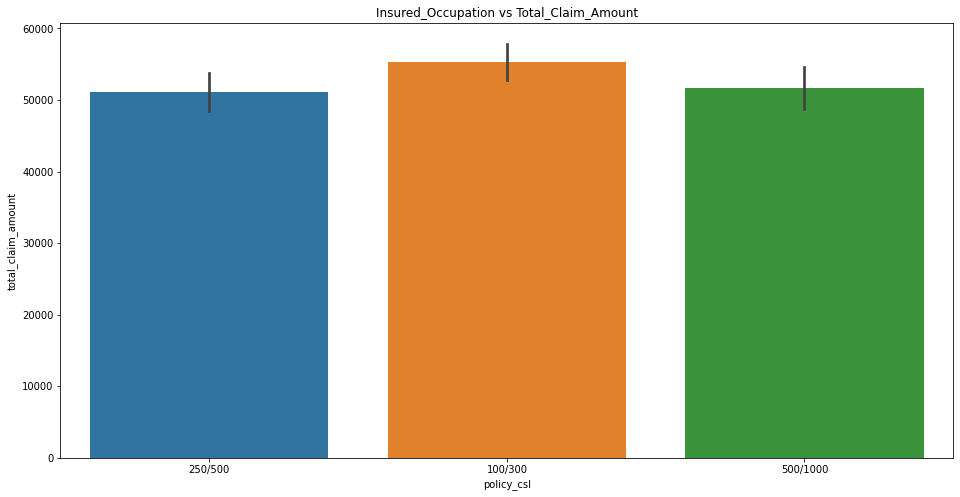

In [28]:
plt.figure(figsize = (16, 8))
sns.barplot(x = 'policy_csl', y = 'total_claim_amount', data = df)

plt.title('Insured_Occupation vs Total_Claim_Amount')

In [29]:
df.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'insured_sex', 'insured_education_level', 'insured_occupation',
       'insured_hobbies', 'insured_relationship', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_make', 'auto_model',
       'auto_year', 'fraud_reported'],
      dtype='object')

In [30]:
for column in df.columns:
    if(df[column].dtypes==object and column != 'total_claim_amount'):
        print(df[column].value_counts())
        print("*"*30)
        print()

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64
******************************

250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64
******************************

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64
******************************

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64
******************************

machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64
******************************

reading           64
exercise          57
paintball         57
bungie-jumping    56
go

In [31]:
df['collision_type'] = df['collision_type'].replace(to_replace ="?", value ="Rear Collision") 
df['property_damage'] = df['property_damage'].replace(to_replace ="?", value ="NO")
df['police_report_available'] = df['police_report_available'].replace(to_replace ="?", value ="NO")

In [32]:
# label endcoding for the object datatypes
for col in df.columns:
    if (df[col].dtypes==object and col != 'total_claim_amount'):
        le = preprocessing.LabelEncoder()
        le = le.fit(df[col])
        df[col] = le.transform(df[col])
        print('Completed Label encoding on',col)

Completed Label encoding on policy_state
Completed Label encoding on policy_csl
Completed Label encoding on insured_sex
Completed Label encoding on insured_education_level
Completed Label encoding on insured_occupation
Completed Label encoding on insured_hobbies
Completed Label encoding on insured_relationship
Completed Label encoding on incident_type
Completed Label encoding on collision_type
Completed Label encoding on incident_severity
Completed Label encoding on authorities_contacted
Completed Label encoding on incident_state
Completed Label encoding on incident_city
Completed Label encoding on property_damage
Completed Label encoding on police_report_available
Completed Label encoding on auto_make
Completed Label encoding on auto_model
Completed Label encoding on fraud_reported


In [33]:
df.head()

,months_as_customer,age,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,2,1,1,4,2,17,0,2,2,0,4,4,1,5,1,1,1,1,71610,6510,13020,52080,10,1,2004,1
1,228,42,1,1,1,4,6,15,2,3,1,1,4,5,5,8,1,0,0,0,5070,780,780,3510,8,12,2007,1
2,134,29,2,0,0,6,11,2,3,0,1,1,4,1,1,7,3,0,2,0,34650,7700,3850,23100,4,30,2007,0
3,256,41,0,1,0,6,1,2,4,2,0,0,4,2,0,5,1,0,1,0,63400,6340,6340,50720,3,34,2014,1
4,228,44,0,2,1,0,11,2,4,3,1,1,2,1,0,20,1,0,0,0,6500,1300,650,4550,0,31,2009,0


In [34]:
df.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'insured_sex', 'insured_education_level', 'insured_occupation',
       'insured_hobbies', 'insured_relationship', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_make', 'auto_model',
       'auto_year', 'fraud_reported'],
      dtype='object')

# Model Training

### Splitting into Train and Test dataset

In [35]:
from sklearn.model_selection import train_test_split

y = df['total_claim_amount']
x = df.drop(['total_claim_amount'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x.values, y.values, test_size=0.25, random_state=42)

In [36]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
x_train = ss.fit_transform(x_train)

x_test = ss.transform(x_test)


In [133]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression()

In [136]:
# Predicting the Test set results
y_pred = lin_reg.predict(x_test)

In [139]:
print('Coefficients: \n', lin_reg.coef_)

Coefficients: 
 [-1.50177974e-11  1.47792889e-11 -3.89022148e-12  8.37729885e-12
  3.69482223e-13  1.90958360e-12 -4.01989553e-12  5.05906428e-12
  3.56692453e-12  1.90851779e-11  1.38555833e-13  8.61177796e-12
 -1.44328993e-12  1.80522264e-12 -3.26849658e-13 -8.19255774e-12
  2.84394730e-12 -2.03037587e-12  8.70414851e-13  6.19815310e-12
  4.89175330e+03  4.82280227e+03  1.88800407e+04 -1.79056769e-12
  1.65556457e-12 -2.24886776e-12 -4.03588274e-12]


Text(0, 0.5, 'Predicted Y')

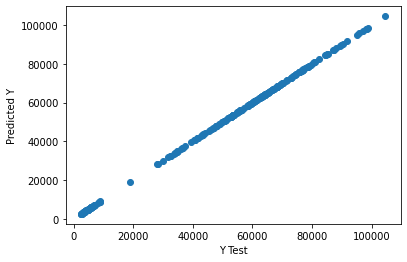

In [140]:
plt.scatter(y_test,y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

## Evaluating the Model


#### Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

### Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.

In [141]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 2.083834260702133e-11
MSE: 7.017667968001878e-22
RMSE: 2.649088138964402e-11


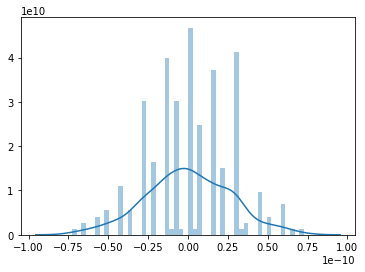

In [142]:
sns.distplot((y_test-y_pred),bins=50);

In [147]:
type(df.columns)

pandas.core.indexes.base.Index

In [148]:
columns = [x for x in df.columns if x not in "total_claim_amount"]

In [149]:
coeffecients = pd.DataFrame(lin_reg.coef_,columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
months_as_customer,-1.501780e-11
age,1.477929e-11
policy_state,-3.890221e-12
policy_csl,8.377299e-12
insured_sex,3.694822e-13
insured_education_level,1.909584e-12
insured_occupation,-4.019896e-12
insured_hobbies,5.059064e-12
insured_relationship,3.566925e-12
incident_type,1.908518e-11


In [39]:
def calculate_accuracy(actual, predicted):
    SST = 0
    SSR = 0
    SSE = 0
    RMSE = 0
    VIF = 0
    RSqr = 0
    MAE = 0
    MAPE = 0
    SST = sum((actual - np.mean(predicted))**2)    # Calculate the SST
    SSR = sum((predicted - np.mean(predicted))**2) # Calculate the SSR
    SSE = sum((actual - predicted)**2)             # Calculate the SSE
    RMSE = np.sqrt((sum((predicted - actual)**2))/len(predicted))  # Calculate the RMSE
    RSqr = 1 - (SSE/SST)                           # Calcualte the R_square
    if RSqr != 1:
        VIF = 1 / (1 - RSqr)                           # Calculate the VIF
    #MAPE_house_price = mape(dtc_predict_train, y_train)           # Calculate the MAPE
    #MAE_house_price = mae(y_train, dtc_predict_train)             # Calculate the MAE
    return RMSE, RSqr, VIF

In [169]:
# create the model
lin_reg.fit(x_train,y_train)

# prediction on train data
lin_reg_predict_train = lin_reg.predict(x_train)

# prediction on test data
lin_reg_predict_test = dtc.predict(x_test)

# calculate the accuracies
RMSE, RSqr, VIF = calculate_accuracy(y_train,lin_reg_predict_train)
print('Decision Tree RMSE train = ',RMSE, 'R-Square train = ',RSqr, 'VIF train = ',VIF)

RMSE, RSqr, VIF = calculate_accuracy(y_test,lin_reg_predict_test)
print('Decision Tree RMSE test = ',RMSE, 'R-Square test = ',RSqr, 'VIF test = ',VIF)

Decision Tree RMSE train =  2.8378722093172114e-11 R-Square train =  1.0 VIF train =  0
Decision Tree RMSE test =  3069.4895341082365 R-Square test =  0.9863376016789782 VIF test =  73.19359138148828


# 2. Decision Tree

In [151]:
from sklearn.tree import DecisionTreeRegressor
dtc = DecisionTreeRegressor(random_state=1)

# create the model
dtc.fit(x_train,y_train)

# prediction on train data
dtc_predict_train = dtc.predict(x_train)

# prediction on test data
dtc_predict_test = dtc.predict(x_test)

# calculate the accuracies
RMSE, RSqr, VIF = calculate_accuracy(y_train,dtc_predict_train)
print('Decision Tree RMSE train = ',RMSE, 'R-Square train = ',RSqr, 'VIF train = ',VIF)

RMSE, RSqr, VIF = calculate_accuracy(y_test,dtc_predict_test)
print('Decision Tree RMSE test = ',RMSE, 'R-Square test = ',RSqr, 'VIF test = ',VIF)

Decision Tree RMSE train =  0.0 R-Square train =  1.0 VIF train =  0
Decision Tree RMSE test =  3069.4895341082365 R-Square test =  0.9863376016789782 VIF test =  73.19359138148828


# 3. Random Forest Regressor

In [40]:
from sklearn.ensemble import RandomForestRegressor
# Random forest model
rfc = RandomForestRegressor()

rfc.fit(x_train,y_train)

# prediction on train data
rfc_predict_train = rfc.predict(x_train)

# prediction on test data
rfc_predict_test = rfc.predict(x_test)

# calculate the accuracies
RMSE, RSqr, VIF = calculate_accuracy(y_train,rfc_predict_train)
print('Random Forest RMSE train = ',RMSE, 'R-Square train = ',RSqr, 'VIF train = ',VIF)

RMSE, RSqr, VIF = calculate_accuracy(y_test,rfc_predict_test)
print('Random Forest RMSE test = ',RMSE, 'R-Square test = ',RSqr, 'VIF test = ',VIF)

Random Forest RMSE train =  698.869949647286 R-Square train =  0.9992995720154667 VIF train =  1427.6985244476186
Random Forest RMSE test =  2017.827926271217 R-Square test =  0.9940954547997645 VIF test =  169.36105425361293


# 4. XG Boost Regressor

In [168]:
import xgboost as xgb

xgb = xgb.XGBRegressor()


xgb.fit(x_train,y_train)

# prediction on train data
xgb_predict_train = xgb.predict(x_train)

# prediction on test data
xgb_predict_test = xgb.predict(x_test)

# calculate the accuracies
RMSE, RSqr, VIF = calculate_accuracy(y_train,xgb_predict_train)
print('Random Forest RMSE train = ',RMSE, 'R-Square train = ',RSqr, 'VIF train = ',VIF)

RMSE, RSqr, VIF = calculate_accuracy(y_test,xgb_predict_test)
print('Random Forest RMSE test = ',RMSE, 'R-Square test = ',RSqr, 'VIF test = ',VIF)

[20:10:02] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Random Forest RMSE train =  539.7431134140546 R-Square train =  0.9995822223529516 VIF train =  2393.6177702779155
Random Forest RMSE test =  1105.2849483621847 R-Square test =  0.9982283948662272 VIF test =  564.4598680239686


# Summarizing accuracy metrics of all the models

In [153]:

print('Metrics of Decision Tree:')
RMSE, RSqr, VIF = calculate_accuracy(y_train,dtc_predict_train)
print('Decision Tree RMSE train = ',RMSE, 'R-Square train = ',RSqr, 'VIF train = ',VIF)
RMSE, RSqr, VIF = calculate_accuracy(y_test,dtc_predict_test)
print('Decision Tree RMSE test = ',RMSE, 'R-Square test = ',RSqr, 'VIF test = ',VIF)
print('                                  ')

print('Metrics of Random Forest:')
RMSE, RSqr, VIF = calculate_accuracy(y_train,rfc_predict_train)
print('Random Forest RMSE train = ',RMSE, 'R-Square train = ',RSqr, 'VIF train = ',VIF)
RMSE, RSqr, VIF = calculate_accuracy(y_test,rfc_predict_test)
print('Random Forest RMSE test = ',RMSE, 'R-Square test = ',RSqr, 'VIF test = ',VIF)

Metrics of Decision Tree:
Decision Tree RMSE train =  0.0 R-Square train =  1.0 VIF train =  0
Decision Tree RMSE test =  3069.4895341082365 R-Square test =  0.9863376016789782 VIF test =  73.19359138148828
                                  
Metrics of Random Forest:
Random Forest RMSE train =  687.8131251437414 R-Square train =  0.9993215593061202 VIF train =  1473.9681876706334
Random Forest RMSE test =  2045.1583509743193 R-Square test =  0.9939344036061067 VIF test =  164.86424995352203


In [2]:
import pickle

In [44]:
x_test[0]

array([-1.75743696, -1.45781445, -1.20416989,  0.0263486 , -0.95055421,
        1.61355068, -0.64554447,  1.10619229, -0.86976227,  0.74641462,
       -0.03466663,  0.86903359, -1.41334248,  1.28817446,  1.46234266,
        1.4752026 , -0.80786544,  1.48036798,  0.00325302, -0.68389354,
        1.73343438,  1.77665173,  0.93925221, -1.36354693, -1.30376135,
       -0.32872233, -0.56195149])

In [41]:
# save the model to disk
filename = 'randomforest.pkl'
pickle.dump(rfc, open(filename, 'wb'))

In [42]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

0.9940954353000258


In [46]:
loaded_model.predict(x_test)

array([ 86418.2,  53497.3,  67892. ,  62328.5,   6738.7,  69278.7,
        70382.2,  54212.9,  48013.9,   3965.2,   4841.5,  87206.7,
         5615.4,  49138.8,  76916.3,   4622. ,  43232.6,  38917.7,
        68723.9,  74262.3,  66848.7,   6085. ,  44881.2,   2874.9,
         5986.2,  73566.2,  52541.2,  77071.2,  59329. ,  44423. ,
        36803.7,  72804. ,  34795.1,  73888.8,  53142.9,  58714.1,
        93363.4,   6473.2,  41648. ,  61650.6,  50658.3,  74708.7,
        32858.1,  92568.3,  54131.1,  60353.9,  32141.3,  65341.1,
         6288.7,   6046.4,  36774. ,  58446.6,  58168.3,  49758.2,
       103200.7,  75052.3,  41956.2,  89239.4,  27969.3,   7102. ,
        78179.3,   2238.2,  47998.8,   8185.8,  71089.4,   6224.7,
        54384.8,  64988.3,  68707.8,  51930.6,  74379. ,  65092.1,
        71025.8,  40364.7,  51469.9,   8114.2,  69473.4,  57654.5,
        65669.5,  58643.9,  33659.9,  86100.5,  40039.9,  38200. ,
        31816.7,   8730.7,  48203.1,  62440.4,  44069.5,  6390

In [ ]:
# save the model to disk
filename = 'dt.pkl'
pickle.dump(dtc, open(filename, 'wb'))

In [ ]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

In [170]:
# save the model to disk
filename = 'xgb.pkl'
pickle.dump(xgb, open(filename, 'wb'))

In [171]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

[20:13:43] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.9982283899265576


In [177]:
type(y_test)

numpy.ndarray

In [178]:
type(x_test)

numpy.ndarray

In [159]:
# save the model to disk
filename = 'standardscalar.pkl'
pickle.dump(ss, open(filename, 'wb'))

In [161]:
#XGBOOST model has better ROC Curve and Cross-validated accuracy, plot feature importance
def rf_feat_importance(m):
    return pd.DataFrame({'feature':['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'insured_sex', 'insured_education_level', 'insured_occupation',
       'insured_hobbies', 'insured_relationship', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'police_report_available', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_make', 'auto_model',
       'auto_year', 'fraud_reported'], 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)


In [162]:
fi = rf_feat_importance(rfc); fi[:15]

,feature,imp
22,vehicle_claim,0.943180
21,property_claim,0.036135
20,injury_claim,0.016601
7,insured_hobbies,0.000358
24,auto_model,0.000353
15,incident_hour_of_the_day,0.000305
25,auto_year,0.000295
23,auto_make,0.000246
6,insured_occupation,0.000230
9,incident_type,0.000217


In [ ]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

In [165]:
#XGBOOST model has better ROC Curve and Cross-validated accuracy, plot feature importance
def rf_feat_importance(m):
    return pd.DataFrame({'feature':['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'insured_sex', 'insured_education_level', 'insured_occupation',
       'insured_hobbies', 'insured_relationship', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'police_report_available', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_make', 'auto_model',
       'auto_year', 'fraud_reported'], 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)


In [167]:
fi = rf_feat_importance(dtc); fi[:15]

,feature,imp
22,vehicle_claim,0.927672
21,property_claim,0.050096
20,injury_claim,0.019921
6,insured_occupation,0.000380
25,auto_year,0.000333
9,incident_type,0.000236
15,incident_hour_of_the_day,0.000218
24,auto_model,0.000190
13,incident_state,0.000138
1,age,0.000124


In [172]:
fi = rf_feat_importance(xgb); fi[:15]

,feature,imp
22,vehicle_claim,0.793815
20,injury_claim,0.108273
21,property_claim,0.094675
14,incident_city,0.000320
7,insured_hobbies,0.000304
11,incident_severity,0.000301
24,auto_model,0.000271
8,insured_relationship,0.000271
13,incident_state,0.000219
0,months_as_customer,0.000212
